## The Shooting method

The shooting method solves boundary values problems using the algorithms we developed for initial value problems, including all the consideration we made for adaptive stepping, stiffness, and high order approximation.

The concept is simple:
1. Choose an *initial* boundary
2. Solve as an IVP to find the function value at the other boundary.
3. Check if the other boundary condition is met.
4. Wrap 1-3 in a root finding algorithm to find the solution.

## Pros / Cons

**Benefits**
* Conceptually Simple: Reduces a boundary value problem to an initial value problem, which is often simpler to solve.
* Leverages Initial Value Solvers: Allows the use of robust and well-tested initial value problem (IVP) solvers, such as Runge-Kutta methods, which are readily available in many software libraries.
* Good for Linear Problems: Can be particularly effective for linear or mildly nonlinear problems where the solution does not vary drastically with initial conditions.
* Flexible for Adjustments: Easily adaptable to different types of BVPs by adjusting the shooting parameters to meet boundary conditions at the other end of the domain.
* Reduced Complexity in Low Dimensions: For low-dimensional systems, it often involves fewer computations and is easier to set up compared to other methods like finite difference or collocation.

**Drawbacks**
* Nonlinear and Sensitive to Initial Guesses: For nonlinear problems, the solution can be highly sensitive to initial guesses of the shooting parameters, potentially leading to divergence or non-convergence.
* Difficulty with Complex or Oscillatory Solutions: Struggles with problems where the solution exhibits rapid changes, oscillations, or sensitivity to initial conditions, as small errors can propagate.
* Limited Effectiveness in High Dimensions: Becomes computationally expensive and less effective for high-dimensional systems or systems with multiple boundary conditions.
* Requires Numerical Root-Finding: Often necessitates a root-finding algorithm (e.g., Newton’s method) to adjust initial guesses to match boundary conditions, adding an additional layer of complexity.

* Potential for Numerical Instability: Errors can accumulate over the integration interval, leading to instability, especially in stiff ODEs or systems with sensitive boundary conditions.


#### Example: Ballistics

NB: Ballistic targetting was likely one of the the original motivations for these tools!

We are launching a rocket, and need it to be 50m altitude after 5 seconds. Ignoring aerodynamic drag, what should the initial speed be?


Answer:
This is a 1D problem for altitude as a function of time, $y(t)$. Given gravity is $-9.8 m/s^2$ the equation of motion is:

$$ \frac{\partial^2 y}{\partial t^2} = -g, \quad   y(0) = 0, y(5) = 50 $$

Rewrite this using reduction of order:

$$\begin{align}
\frac{\partial y}{\partial t} &= v \\
\frac{\partial v}{\partial t} &= -g \\
\end{align}$$

In [ ]:
# prompt: solve the above system with the solve_ivp method

import numpy as np
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import root

def model(t, y):
  y, v = y
  g = -9.8  # Acceleration due to gravity
  dydt = v
  dvdt = g
  return [dydt, dvdt]

# Initial condition for altitude (y)
y0 = 0

# Define the time span
t_span = [0, 5]

# Define the boundary condition for altitude at the end time
y_end = 50

# Implement the shooting method
def shooting_method(v0):
  y_initial = [y0, v0[0]]
  sol = solve_ivp(model, t_span, y_initial, method='RK45')
  return sol.y[0][-1]


# Find the root for the shooting method
result = root(lambda v0: shooting_method(v0) - y_end, 1) # Initial guess for v0
print(result)
v0 = result.x[0]  # The calculated initial velocity

# Solve the IVP with the found initial velocity
y_initial = [y0, v0]
sol = solve_ivp(model, t_span, y_initial, method='RK45')

# Print the solution
print(f"Initial velocity (v0): {v0:.2f} m/s")
print(f"Altitude at t=5s: {sol.y[0][-1]:.2f} m")

 message: The solution converged.
 success: True
  status: 1
     fun: 2.1316282072803006e-14
       x: [ 3.450e+01]
  method: hybr
    nfev: 4
    fjac: [[-1.000e+00]]
       r: [-5.000e+00]
     qtf: [-3.652e-10]
Initial velocity (v0): 34.50 m/s
Altitude at t=5s: 50.00 m


Look at the analytical solution:
$$y(t) = v0 t - (g t^2)/+2$$

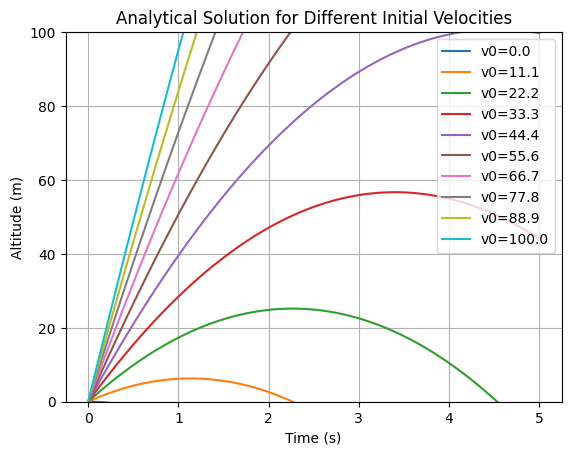

In [ ]:
# prompt: plot the analytical asolution with v0 from 0 to 100

import matplotlib.pyplot as plt
import numpy as np

# Analytical solution
g = -9.8
t = np.linspace(0, 5, 100)
v0_values = np.linspace(0, 100, 10)

for v0 in v0_values:
  y_analytical = v0 * t + (g * t**2) / 2
  plt.plot(t, y_analytical, label=f'v0={v0:.1f}')


plt.xlabel('Time (s)')
plt.ylabel('Altitude (m)')
plt.title('Analytical Solution for Different Initial Velocities')
plt.legend()
plt.ylim(0, 100)
plt.grid(True)
plt.show()